NAME: KADESHA AMBRIS
STUDENT ID: 816006483

In [704]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [778]:
df = pd.read_csv('survey.csv')

In [779]:
df.shape

(1259, 27)

In [780]:
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [781]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,27/08/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,Jun-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,27/08/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,27/08/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,Jun-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,27/08/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,27/08/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [782]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [783]:
text = df.dtypes[df.dtypes == "object"].index
text

Index(['Timestamp', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [784]:
df[text].describe()

,Timestamp,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
count,1259,1259,1259,744,1241,1259,1259,995,1259,1259,...,1259,1259,1259,1259,1259,1259,1259,1259,1259,164
unique,884,49,48,45,2,2,2,4,6,2,...,5,3,3,3,3,3,3,3,2,160
top,27/08/2014 15:24,Male,United States,CA,No,No,Yes,Sometimes,Jun-25,No,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,* Small family business - YMMV.
freq,8,615,751,138,1095,767,637,465,290,883,...,563,490,925,774,516,1008,557,576,1075,5


In [785]:
df = df.drop(['Timestamp','state','comments','Gender'], axis=1)

In [786]:
df.head()

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,United States,NaN,No,Yes,Often,Jun-25,No,Yes,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,United States,NaN,No,No,Rarely,More than 1000,No,No,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Canada,NaN,No,No,Rarely,Jun-25,No,Yes,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,United Kingdom,NaN,Yes,Yes,Often,26-100,No,Yes,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,United States,NaN,No,No,Never,100-500,Yes,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [787]:
all_nan_cols = df.columns[df.isna().any()]
all_nan_cols

Index(['self_employed', 'work_interfere'], dtype='object')

In [788]:
df["self_employed"].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [789]:
df["self_employed"].fillna("No",inplace = True)

In [790]:
employed_encoder = LabelEncoder()
df["self_employed"] = employed_encoder.fit_transform(df["self_employed"])

In [791]:
df["self_employed"].unique()

array([0, 1], dtype=int64)

In [792]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [793]:
df["work_interfere"].mode()

0    Sometimes
dtype: object

In [794]:
df['work_interfere'].fillna('Sometimes', inplace=True)

In [795]:
df["work_interfere"].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [796]:
family_encoder = LabelEncoder()
df["family_history"] = family_encoder.fit_transform(df["family_history"])

In [797]:
treatment_encoder = LabelEncoder()
df["treatment"] = treatment_encoder.fit_transform(df["treatment"])

In [798]:
remote_encoder = LabelEncoder()
df["remote_work"] = remote_encoder.fit_transform(df["remote_work"])

In [799]:
df['tech_company'].unique()

array(['Yes', 'No'], dtype=object)

In [800]:
tech_encoder = LabelEncoder()
df["tech_company"] = tech_encoder.fit_transform(df["tech_company"])

In [801]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [802]:
df['wellness_program'].unique()

array(['No', "Don't know", 'Yes'], dtype=object)

In [803]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [804]:
df.head()

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,United States,0,0,1,Often,Jun-25,0,1,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,United States,0,0,0,Rarely,More than 1000,0,0,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Canada,0,0,0,Rarely,Jun-25,0,1,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,United Kingdom,0,1,1,Often,26-100,0,1,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,United States,0,0,0,Never,100-500,1,1,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [805]:
df["Age"].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [806]:
df['Age'] = df['Age'].abs()

In [807]:
large = np.where(df["Age"] > 100)
large

(array([364, 390, 715], dtype=int32),)

In [808]:
small = np.where(df["Age"] < 18)
small

(array([ 734,  989, 1090, 1127], dtype=int32),)

In [809]:
df = df.drop([364,390,715,734,989,1090,1127])

In [810]:
df["Age"].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

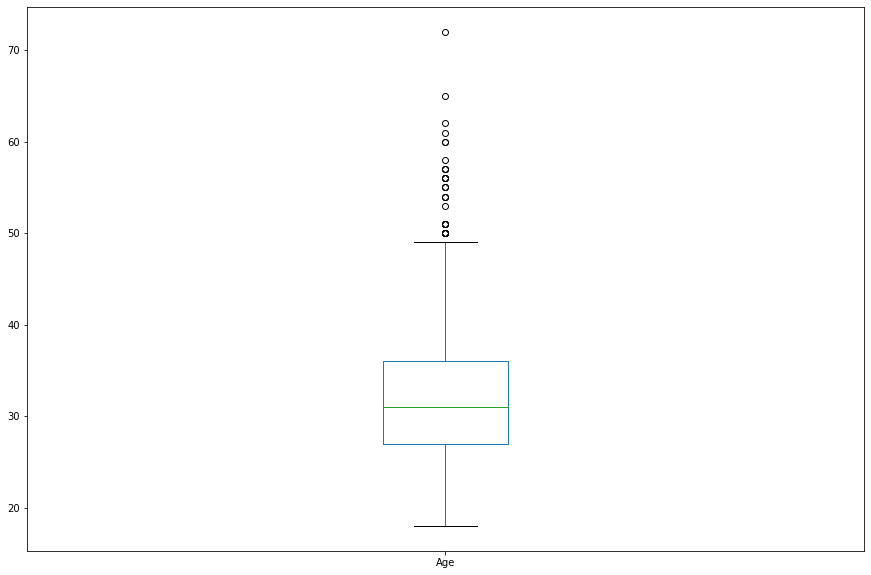

In [811]:
df["Age"].plot(kind="box", figsize=(15,10))
plt.show()

The average age is about 25 to 35 years old

In [812]:
highestAge = df["Age"].max()
highestAge

72

In [813]:
Age = np.where(df["Age"] == highestAge)
Age

(array([1175], dtype=int32),)

In [814]:
df.loc[1182]

Age                                     72
Country                      United States
self_employed                            0
family_history                           1
treatment                                1
work_interfere                       Never
no_employees                      500-1000
remote_work                              1
tech_company                             0
benefits                               Yes
care_options                      Not sure
wellness_program                Don't know
seek_help                              Yes
anonymity                       Don't know
leave                        Somewhat easy
mental_health_consequence            Maybe
phys_health_consequence              Maybe
coworkers                     Some of them
supervisor                             Yes
mental_health_interview                 No
phys_health_interview                   No
mental_vs_physical              Don't know
obs_consequence                        Yes
Name: 1182,

In [815]:
avgAge = df['Age'].mean()
avgAge

32.07428115015974

In [816]:
location = np.where(df["Age"] == 32)
location

(array([   2,   17,   30,   53,   56,   78,   89,  109,  113,  127,  131,
         151,  177,  194,  205,  213,  214,  226,  248,  265,  267,  269,
         293,  322,  363,  372,  396,  421,  456,  500,  505,  540,  549,
         553,  565,  603,  608,  626,  652,  655,  660,  692,  693,  703,
         705,  712,  737,  743,  768,  773,  782,  792,  800,  855,  856,
         864,  867,  887,  934,  939,  956,  993, 1017, 1018, 1074, 1079,
        1083, 1086, 1114, 1124, 1142, 1143, 1148, 1158, 1162, 1173, 1191,
        1198, 1220, 1237, 1239, 1248], dtype=int32),)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F0488F0>]],
      dtype=object)

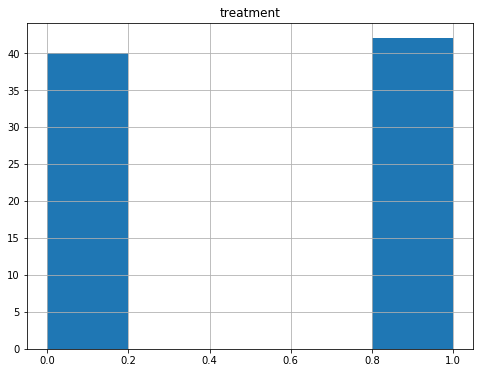

In [817]:
dfl = df.loc[location]
dfl.hist(column='treatment', figsize=(8,6), bins=5)

Employee with the highest age between 18 and 100 did sought treatment for mental health illness but employees at the average age of 32 approximately did and did not sought out treatment. Therefore age can be a factor in the cause of mental illness when that employee is old.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F05DB10>]],
      dtype=object)

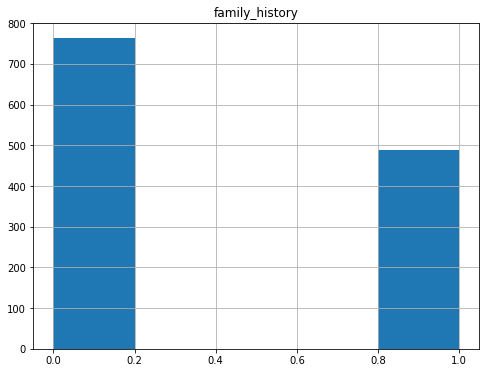

In [818]:
df.hist(column='family_history', figsize=(8,6), bins=5)

Majority of employees do not have a history of mental illness in their family

In [819]:
df['Country'].unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand', 'Spain',
       'Finland', 'Uruguay', 'Israel', 'Bosnia and Herzegovina',
       'Hungary', 'Singapore', 'Japan', 'Nigeria', 'Croatia', 'Norway',
       'Thailand', 'Denmark', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

In [820]:
groupedCountry = df.groupby('Country').size()
groupedCountry

Country
Australia                  21
Austria                     3
Belgium                     6
Bosnia and Herzegovina      1
Brazil                      6
Bulgaria                    4
Canada                     72
China                       1
Colombia                    2
Costa Rica                  1
Croatia                     2
Czech Republic              1
Denmark                     2
Finland                     3
France                     13
Georgia                     1
Germany                    45
Greece                      2
Hungary                     1
India                      10
Ireland                    27
Israel                      5
Italy                       7
Japan                       1
Latvia                      1
Mexico                      3
Moldova                     1
Netherlands                27
New Zealand                 8
Nigeria                     1
Norway                      1
Philippines                 1
Poland                      7
Po

The country where most of the employees reside is in the United States

In [821]:
highCountry = np.where(df["Country"] == 'United States')
dfc = df.loc[highCountry]

C:\Users\kades\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E91D670>]],
      dtype=object)

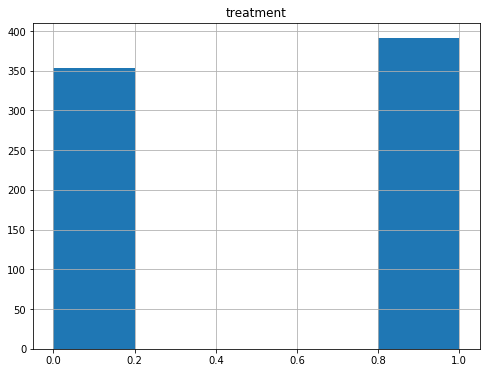

In [822]:
dfc.hist(column='treatment', figsize=(8,6), bins=5)

Majority of Employees in the United States have sought out treatment for mental illness. Therefore Country may be a factor in cause of mental illness

In [823]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes'], dtype=object)

In [824]:
def transInterfere(x):
    if x == 'Often':
        return 1
    if x == 'Rarely':
        return 2
    if x == 'Never':
        return 3
    if x == 'Sometimes':
        return 4

In [825]:
df['work_interfere'] = df['work_interfere'].apply(transInterfere)

In [826]:
df.head()

,Age,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,United States,0,0,1,1,Jun-25,0,1,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,United States,0,0,0,2,More than 1000,0,0,Don't know,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Canada,0,0,0,2,Jun-25,0,1,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,United Kingdom,0,1,1,1,26-100,0,1,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,United States,0,0,0,3,100-500,1,1,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E940570>]],
      dtype=object)

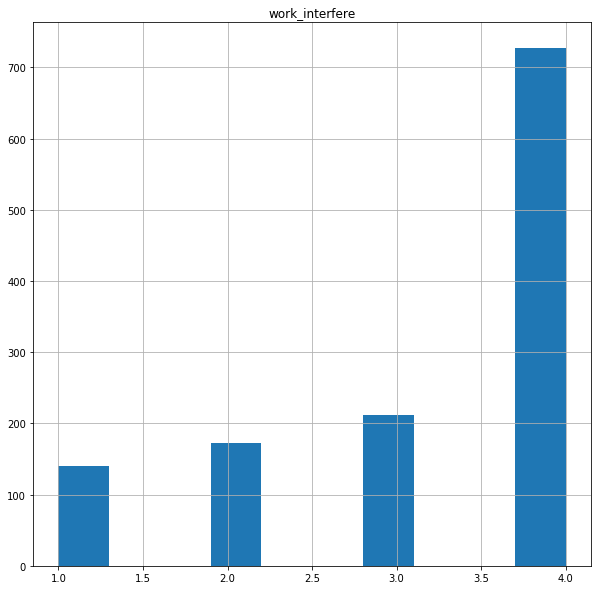

In [827]:
df.hist(column='work_interfere', figsize=(10,10), bins=10)

Most of the employees agrees that their mental illness sometimes interferes with their job

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E91DB30>]],
      dtype=object)

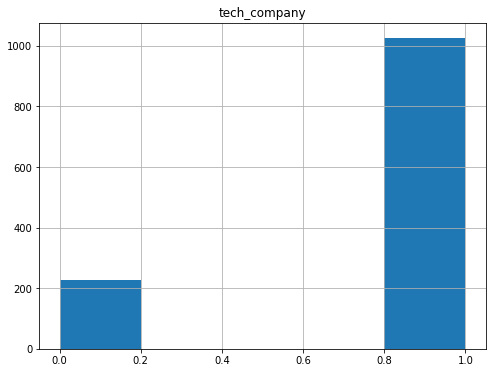

In [828]:
df.hist(column='tech_company', figsize=(8,6), bins=5)

In [829]:
highTech = np.where(df["tech_company"] == 1)
dft = df.loc[highTech]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F196410>]],
      dtype=object)

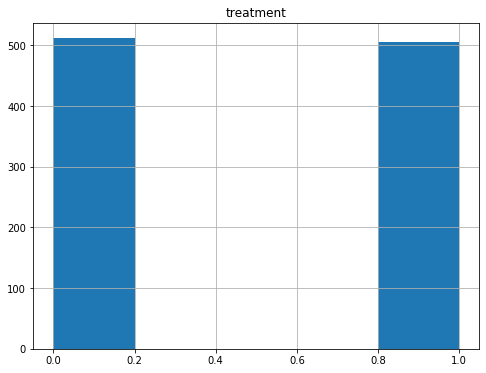

In [830]:
dft.hist(column='treatment', figsize=(8,6), bins=5)

An employee working in a tech company or not work in a tech company does not cause mental illness as seen on the graph above.

In [831]:
df['seek_help'].unique()

array(['Yes', "Don't know", 'No'], dtype=object)

In [832]:
def transHelp(x):
    if x == 'Yes':
        return 1
    if x == "Don't know":
        return 2
    if x == 'No':
        return 3

In [833]:
df['seek_help'] = df['seek_help'].apply(transHelp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0F1B93F0>]],
      dtype=object)

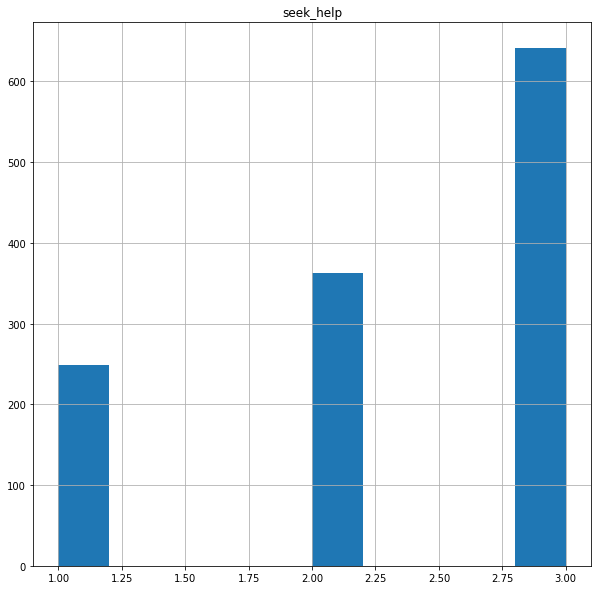

In [834]:
df.hist(column='seek_help', figsize=(10,10), bins=10)

Majority of employers have not provide resources to learn more about mental health
issues and how to seek help which shows a lack of interest in the topic

In [835]:
df['mental_vs_physical'] = df['mental_vs_physical'].apply(transHelp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0EC46E70>]],
      dtype=object)

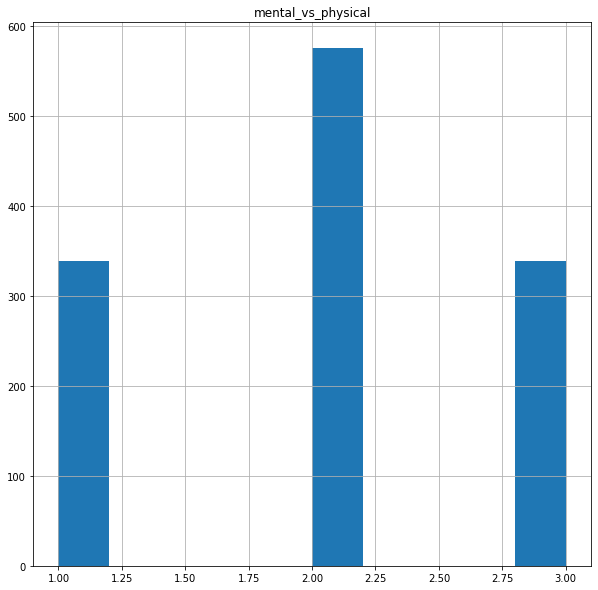

In [836]:
df.hist(column='mental_vs_physical', figsize=(10,10), bins=10)

As shown in the graph, most of the employees do not know if their employer takes mental health as seriously as physical health. This shows the lack of imformation that is being revealed to employees by their employers.

In [837]:
df['benefits'] = df['benefits'].apply(transHelp)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12D39690>]],
      dtype=object)

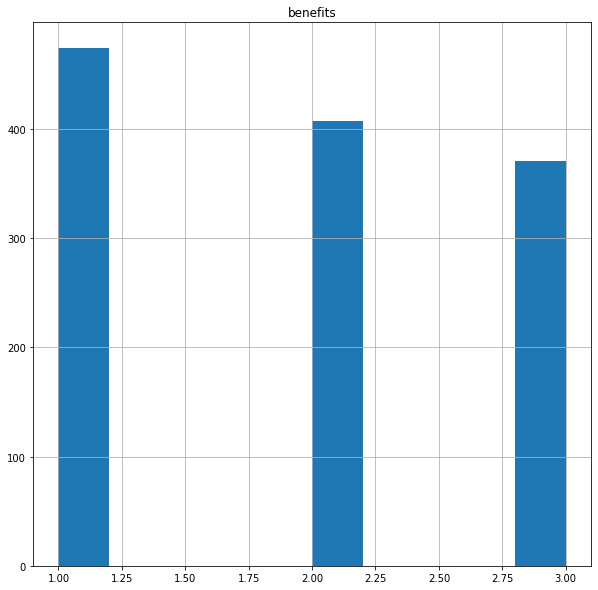

In [838]:
df.hist(column='benefits', figsize=(10,10), bins=10)

In [839]:
df['care_options'].unique()

array(['Not sure', 'No', 'Yes'], dtype=object)

In [840]:
def transCare(x):
    if x == 'Yes':
        return 1
    if x == "Not sure":
        return 2
    if x == 'No':
        return 3

In [841]:
df['care_options'] = df['care_options'].apply(transCare)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13859410>]],
      dtype=object)

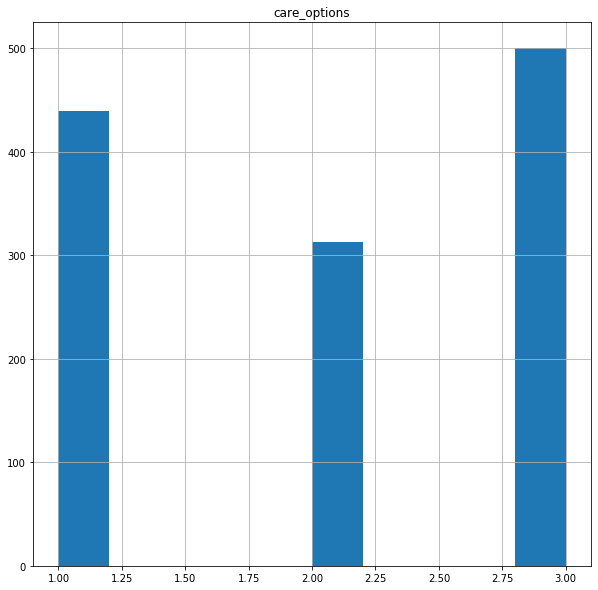

In [842]:
df.hist(column='care_options', figsize=(10,10), bins=10)

Most employers provide mental health benefits but majority of employees do not know the options provided for mental health care

In [843]:
df['leave'].unique()

array(['Somewhat easy', "Don't know", 'Somewhat difficult',
       'Very difficult', 'Very easy'], dtype=object)

In [844]:
def transLeave(x):
    if x == 'Somewhat easy':
        return 1
    if x == "Don't know":
        return 2
    if x == 'Somewhat difficult':
        return 3
    if x == 'Very difficult':
        return 4
    if x == 'Very easy':
        return 5

In [845]:
df['leave'] = df['leave'].apply(transLeave)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138A5FB0>]],
      dtype=object)

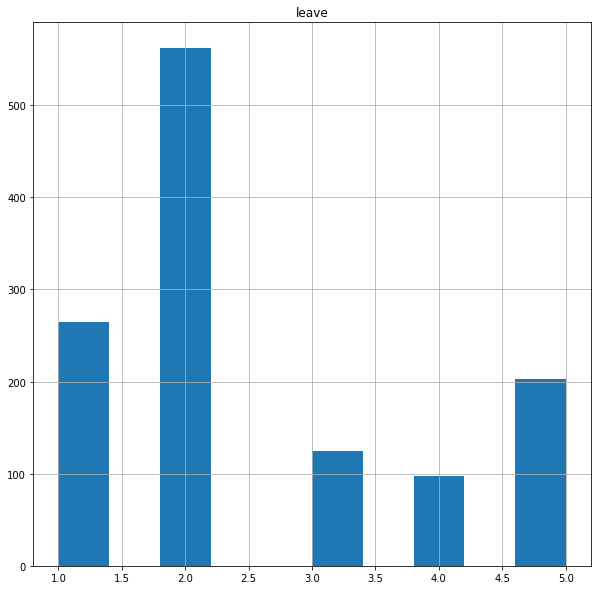

In [846]:
df.hist(column='leave', figsize=(10,10), bins=10)

In [847]:
df['obs_consequence'].unique()

array(['No', 'Yes'], dtype=object)

In [848]:
obs_encoder = LabelEncoder()
df["obs_consequence"] = obs_encoder.fit_transform(df["obs_consequence"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14926F10>]],
      dtype=object)

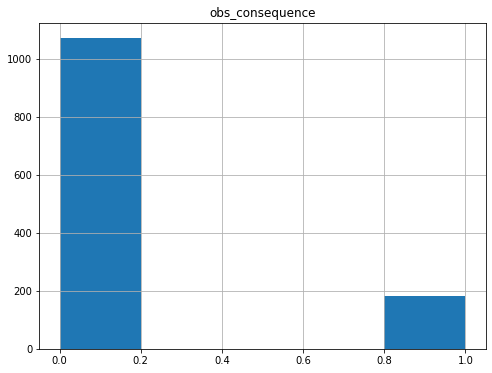

In [849]:
df.hist(column='obs_consequence', figsize=(8,6), bins=5)

Over 500 employees do not know How easy is it to take medical leave for a mental health condition yet over 1000 employees have not observed any negative consequences forcoworkers with mental health conditions in your workplace
 

Looking at the dataset, we can conlcude that employers do not inform their employees sufficently about the seriousness and and how to go about the topic of mental illness in the workplace